In [386]:
import numpy as np
import math as mp
import pandas as pd
import matplotlib.pyplot as plt

In [387]:
gamma = 1
eta = 2
sigma = 5
beta_hh = 0.99
r = 0.01
beta = 1 /( 1.0 +r)
beta1 =1/( (1.0 +r* np.exp(30/(36.5*0.9)))) 
W = 1
power = (1+eta)/(-gamma-eta)
mu = 0.1

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_28478/2291322681.py:6: RuntimeWarning: divide by zero encountered in log
  N = -(data_tau) - 1/np.log(beta*c)
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_28478/2291322681.py:7: RuntimeWarning: divide by zero encountered in log
  tau1= -1/np.log(beta*c) - N
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_28478/2291322681.py:9: RuntimeWarning: divide by zero encountered in log
  tau2= -1/np.log(beta1*c) - N


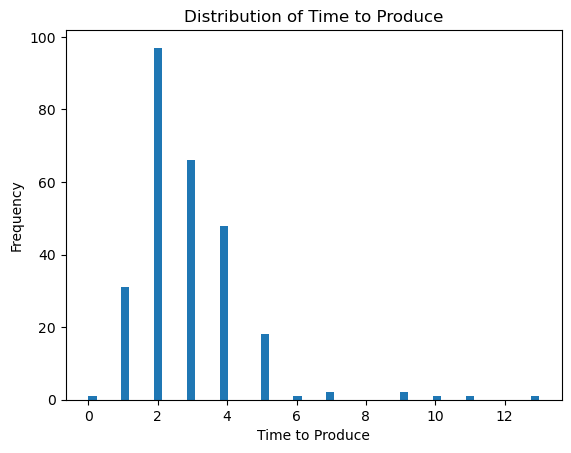

In [388]:
data=pd.read_csv('APP_data_usa_goods.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
data_tau=(data['invtCogsRatio']* 36.5/(30*0.1))
tau_diff = np.zeros(( 1000,1))
i = 0
for c in np.linspace(0, 0.99, 1000): 
    N = -(data_tau) - 1/np.log(beta*c) 
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0     
    tau2= -1/np.log(beta1*c) - N
    tau2[tau2<0] = 0    
    tau_diff[i] = np.mean(np.abs(tau1-tau2))
    i = i+1

min_val = np.min(np.abs(tau_diff-1))
argmins = np.where(np.abs(tau_diff-1) == min_val)[0]
argmins
c_list = np.linspace(0, 0.99, 1000)
c=c_list[argmins]
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0  
tprod = (beta*c)**tau * (tau + N)
plt.hist(tau, bins = 55, alpha=1, label='tau_noise')
plt.xlabel('Time to Produce')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Produce')
plt.show()
tau = np.array(tau, dtype=int)

In [389]:

def consumption_function(P, theta):
    return (P)**power * theta**(1/(gamma+eta))
def euler_equation(P_0, P_1, theta_0, theta_1, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1, theta_1) / consumption_function(P_0, theta_0))**((gamma))
    price_growth_comp = (P_0 / P_1)* (theta_1/theta_0)
    wage_inflation = 1/(consumption_growth_comp / (price_growth_comp *  (beta_hh *   (1+r)) ))
    return wage_inflation
def price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1,theta_1) / consumption_function(P_0, theta_0))**((gamma)) * (theta_1/theta_0)
    constants = (beta_hh * (1+r))
    price_inflation = 1/ (consumption_growth_comp / constants)
    return price_inflation

In [390]:

def generate_pattern_array_with_extra_rows(tau):
    # 1) Create the original n×n pattern
    n = len(tau)+ int(np.min(tau))
    m = int(np.max(tau)) + int(np.min(tau))

    mx = int(max(tau))
    missing_count = len(set(range(int(max(tau) )+ 1)) - set(tau))
    print(missing_count)


    A = np.ones((m+2, n+missing_count), dtype=float)
    count = 0
    for i in range(1, m+2):
        for j in range(len(tau[tau == i-1])):
            A[i, n- i-j - count] = 0.95  # 0.9 shifts diagonally from right to left as we go down
        if len(tau[tau == i-1]) > 1:
            count += len(tau[tau == i-1])-1
    # 2) Create the two extra rows:
    #    (a) one row with 0.9 at the leftmost column,
    #    (b) one row of all ones.

    row_all_ones = np.ones(n+missing_count, dtype=float)
    A_extended = np.vstack([A,row_all_ones])
    A_extended = A_extended[:,0:n - int(np.min(tau))]

    return A_extended

In [391]:
power = (1+eta)/(-gamma-eta)
tau1= -1/np.log(beta*c) - N
tau1[tau1<0] = 0  
tau1_floor = np.floor(tau1)
tau1_ceil = np.ceil(tau1)
tprod1_ceil=  (beta*c)**tau1_ceil * (tau1_ceil + N)**1
tprod1_floor=  (beta*c)**tau1_floor * (tau1_floor + N)**1

tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
tau1[tau1<0] = 0  
tprod1 = (beta*c)**tau1 * (tau1 + N)**1

tau1 = tau1[::-1]

tprod1=  np.array((beta*c)**tau1 * (tau1 + N)**1 )  
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))

2


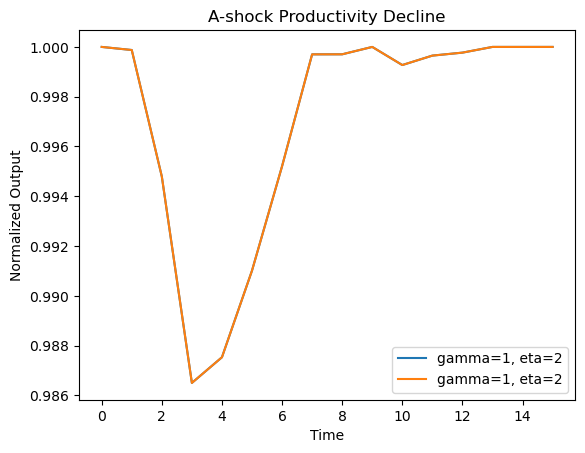

In [392]:
power = (1+eta)/(-gamma-eta)
tau1= -1/np.log(beta*c) - N
tau1[tau1<0] = 0  
tau1_floor = np.floor(tau1)
tau1_ceil = np.ceil(tau1)
tprod1_ceil=  (beta*c)**tau1_ceil * (tau1_ceil + N)**1
tprod1_floor=  (beta*c)**tau1_floor * (tau1_floor + N)**1

tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
tau1[tau1<0] = 0  
tprod1 = (beta*c)**tau1 * (tau1 + N)**1

tau1 = tau1[::-1]

tprod1=  np.array((beta*c)**tau1 * (tau1 + N)**1 )  
A= generate_pattern_array_with_extra_rows(tau1)
P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
plt.plot( (P0)**power/P0[0]**power, label=f'gamma={gamma}, eta={eta}')
plt.plot( 1/(P0)*P0[0], label=f'gamma={gamma}, eta={eta}')

plt.title('A-shock Productivity Decline')
plt.xlabel('Time')
plt.ylabel('Normalized Output')
plt.legend()
plt.show()

In [409]:
import numpy as np
import itertools

sequence_length = 1
r_choice = np.linspace(0, 0.0125, 6)  # 6 values from 0 to 0.0125 inclusive

# Generate all possible combinations (Cartesian product)
all_combinations = list(itertools.product(r_choice, repeat=sequence_length))

# Convert to NumPy array
big_array = np.array(all_combinations)

print(big_array.shape)  # Should be (6^6, 6) = (46656, 6)

# Assign to r_arrange
r_arrange = big_array
size = r_arrange.shape[0]


(6, 1)


In [410]:
time_length = 20

In [411]:
P = np.zeros((time_length, size))
C = np.zeros((time_length, size))

k=0
tau_list = {}
index_diff_list = {}
beta_org = (1 / (1 + 0.01))*c
tau= -1/np.log(beta_org) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  beta_org**tau_ceil * (tau_ceil + N)
tprod_floor=  beta_org**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0 
tprod1=  np.array(beta_org**tau * (tau + N) )  
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma)) 
tau = np.array(tau, dtype=int)
A = generate_pattern_array_with_extra_rows(tau)
for w in range(size): 
    beta_list = 1/(1+r_arrange[w]) * c
    if len(beta_list) < max(tau):  
        pad_length = max(tau) - len(beta_list)
        beta_list = np.concatenate([beta_list, np.full(pad_length, beta_org)])        
    P[0,w] = P0
    C[0,w] = P0**power
    # Step 2: Compute beta product per tau
    for j in range(1, time_length ):
        beta_prod = []
        for i in range(len(tau)):
            k = tau[i]
            if k == 0:
                beta_prod.append(1.0)
            elif k ==1:
                beta_prod.append(beta_list[0])
            else:
                beta_prod.append(np.prod(beta_list[:k]))


        beta_prod = np.array(beta_prod)   
        try:
            t_prod_pred = A[j,:]*beta_prod * (tau + N)
        except IndexError:
            t_prod_pred = beta_prod * (tau + N)

        P1 = (np.sum(1/(t_prod_pred)**(1-sigma)))**(1/(1-sigma)) 

        C[j,w] = P1**power
        P[j,w] = P1
        beta_list = np.concatenate([beta_list[1:], np.array(beta_org)])



2


In [416]:
k=0
deviation_gap = np.zeros((size, 1))
for r in r_arrange: 
    C_temp = C[:,k]
    C_temp_no_zeros = C_temp[C_temp != 0]
    Y = np.zeros((len(C_temp_no_zeros), 1))
    Y[0] = (C_temp_no_zeros[0]) / (C_temp_no_zeros[-1])
    Y[1:,0] = (C_temp_no_zeros[1:])  / (C_temp_no_zeros[-1])


    deviation_gap[k] = np.sum((Y - 1 )**2) 
    k = k+1

In [417]:
argmins_gap = np.where(deviation_gap == np.min(deviation_gap))[0]
argmins_gap

array([4])

In [418]:
r_arrange[argmins_gap]

array([[0.01]])

In [419]:
target = np.array([0.01]*sequence_length)
matches = np.all(np.isclose(r_arrange, target), axis=1)

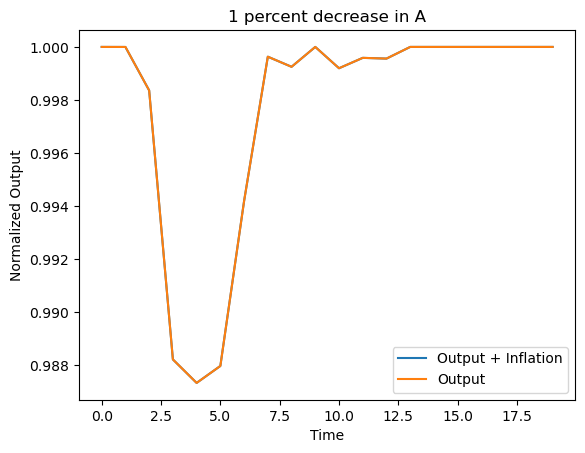

In [420]:
C_mask = C[:,argmins_gap]
C_mask_no_zeros = C_mask[C_mask != 0]    
C_mask_no_zeros = (C_mask_no_zeros) 
plt.plot( (C_mask_no_zeros[0:])/C_mask_no_zeros[-1], label='Output')

C_mask = C[:,matches]
C_mask_no_zeros = C_mask[C_mask != 0]    
C_mask_no_zeros = (C_mask_no_zeros) 
plt.plot( (C_mask_no_zeros[0:])/C_mask_no_zeros[-1], label='Original')
plt.legend(['Output + Inflation', 'Output', 'Inflation'])
plt.title('1 percent decrease in A')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()